## Python statistics essential training - 03_05_morevariables

In [1]:
#meta 4/7/2020
#Ch3. Visualizing and Describing Data
#my code and solution code bits

In [2]:
import numpy as np
import scipy.stats
import pandas as pd

In [31]:
import matplotlib
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [4]:
import re
import mailbox
import csv

# More Quantitative Variables
Look at ways to encode more than two variables into plots. 

# Gapminder
Identifying and explaining global trends in data with the late statistician and public health expert Hans Rosling.

- book Factfulness  
- website gapminder.org

## 0. Load Data
Basic facts about life in countries:  
the population, the expected lifetime (the average age of death for all born), the percentage of children surviving to age five, the average number of babies per woman, the gross national product divided by population, and the income available (avg) to each citizen each day (last two columns are given in 2011 equivalent dollars).

In [5]:
gapminder = pd.read_csv('lynda_data/gapminder.csv')
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
country             14740 non-null object
year                14740 non-null int64
region              14740 non-null object
population          14740 non-null float64
life_expectancy     14740 non-null float64
age5_surviving      14740 non-null float64
babies_per_woman    14740 non-null float64
gdp_per_capita      14740 non-null float64
gdp_per_day         14740 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


## 1. Plot (interactive)
### - Start with 2 Dimensions
We start by creating an interactive plot showing data for all countries together similar to the plots found on the gapminder.org website. (Similar to 03_01 plot).  

We'll pick up where we left things in the last video. Plotting income per person per day versus life expectancy. 


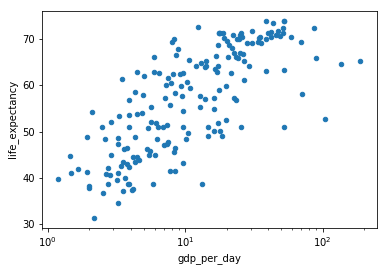

In [6]:
#start function and keep changing it to add features. 
#simplest version of our plotting function selects data for a year & creates a scatterplot. 
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)

plotyear(1965)


We get a sense of the correlation between the two variables, but don't really know which country is which. 

### - 4 Dims
- Use the size of points as an additional dimension to encode population
- Use color to encode child mortality, light is better than dark


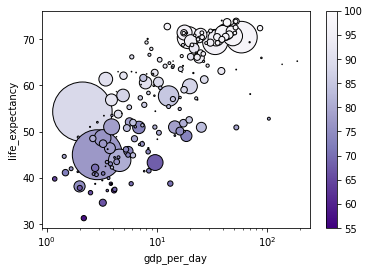

In [30]:
#enhance plot function
def plotyear(year):
    #data = gapminder[gapminder.year == year] #.sort_values('population',ascending=False)
    #sort dataframe by population, so that larger dots sit in the back and don't hide too many others.
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    
    #create an array area and pass it to scatter. 
    #note: the number in data populations are so big, they will be huge dots.
    #      need to slim them down. Maybe by a factor of a million 1e-6
    #area = 5e-5 * data.population #0.00005
    area = 5e-6 * data.population #0.000005
    
    #add color to encode child mortality, select a color map (reverse the scale so the dark will be worse)
    color = data.age5_surviving
    
    #add borders (black)
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), 
                      #fix the range of the color scale with vmin and vmax
                      vmin=55, vmax=100,
                      linewidths=1, edgecolors='k', 
                      #dont hide x label
                      sharex=False)

plotyear(1965)

At this point, we're visualizing four variables in this plot. 

### - 5 Dims
- color the borders of the dots to represent one more variable: region (categorical)


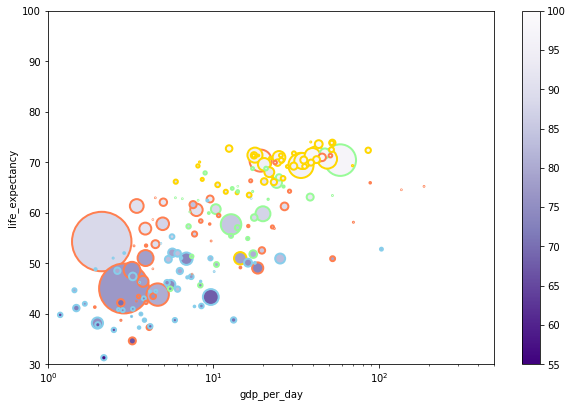

In [33]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    #turn the region into named colors using the method map of pandas, which takes the dictionary
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=2, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    #set the axes ranges
    plt.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(1965)

### - Interactive
Let's animate. Instead of a slider as in the first video of this chapter, we'll use a simpler selector.


In [34]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), â€¦

<function __main__.plotyear(year)>

As I move through the years, the progress of all countries is evident. In income, life expectancy, and child mortality. But especially so for Asian countries, which now host more than half of the world's population. 

How do we know? Well, pandas can tell us. 


In [35]:
#sum up the total population
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [36]:
#population by region
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

Asia has more than 4.3 billion people of the 7.3 total. 

### - Add Income Bands
We can do one more thing that would please Rosling and show his income bands.   
- plot vertical lines at 4, 16 and 64 dollars


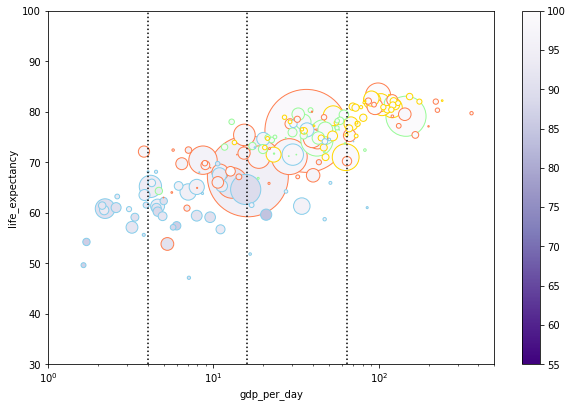

In [37]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa': 'skyblue','Europe': 'gold','America': 'palegreen','Asia': 'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color,
                      colormap=matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False,
                      figsize=(10,6.5))

    for level in [4,16,64]:
        pp.axvline(level,linestyle=':',color='k')
    
    plt.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)

Level one, less than four dollars is extreme poverty. We see that by 2015, most of the world has risen out of extreme poverty. With a lot of Asia occupying level three, between 16 and 64, that was more typical of the developed world back in 1965. 

### - Scatter Matrix
Statisticians and data analysts have thought of many more ways to plot multiple quantitative variables at once. Some of those are available in the panda sub module, 'Plotting'.

For instance, we can plot a scatter matrix. And we select again year 2015. And we select four variables. I need to give the data to scanner matrix.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x107d442b0>,
      dtype=object)

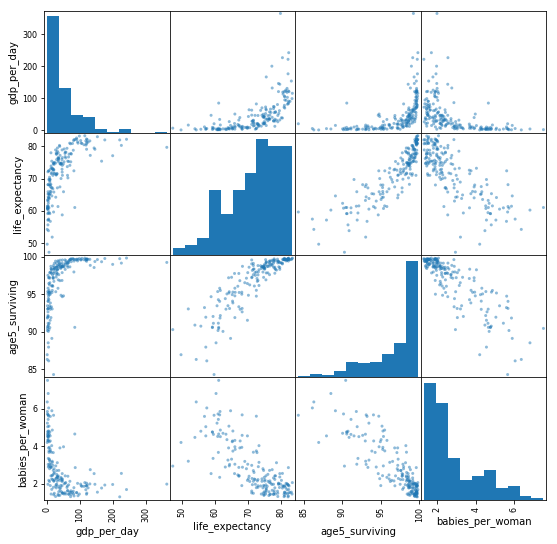

In [43]:
data = gapminder.loc[gapminder.year == 2015,['gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]

pd.plotting.scatter_matrix(data,figsize=(9,9))

What we see here, are 
- the one dimensional and 
- two dimensional paired distributions of the variables. 

Now we can see very clear trends between all variables.  All positive trends will be a little clear if we use the logarithmic income. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a16a52748>,
      dtype=object)

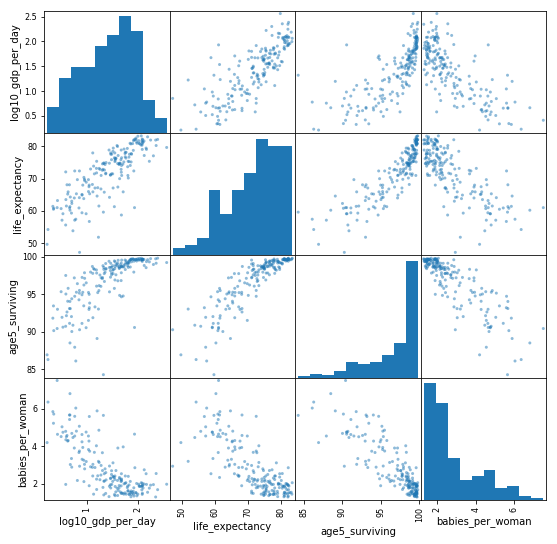

In [44]:
#use the logarithmic income, add it gapminder dataframe.
gapminder['log10_gdp_per_day'] = np.log10(gapminder['gdp_per_day'])

data = gapminder.loc[gapminder.year == 2015,['log10_gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]


pd.plotting.scatter_matrix(data,figsize=(9,9))